**INTRODUCTION**

A traffic collision, also called a motor vehicle collision, car accident, or car crash, occurs when a vehicle collides with another vehicle, pedestrian, animal, road debris, or other stationary obstruction, such as a tree, pole or building. Traffic collisions often result in injury, disability, death, and property damage as well as financial costs to both society and the individuals involved. In an effort to reduce the frequency of car collisions, a machine learning model must be developed to predict the severity of an accident given the current weather, road and visibility conditions. When conditions are bad, this model will alert drivers to remind them to be more careful.

**DATA UNDERSTANDING**

Our predictor or target variable will be 'SEVERITYCODE' because it is used measure the severity of an accident from 0 to 4 within the dataset.

Severity codes are as follows: 0: Little to no Probability (Clear Conditions) 1: Very Low Probability — Chance or Property Damage 2: Low Probability — Chance of Injury 3: Mild Probability — Chance of Serious Injury 4: High Probability — Chance of Fatality

In it's original form, this data is not fit for analysis. For one, there are many columns that we will not use for this model. Also, most of the features are of type object, when they should be numerical type. We must use label encoding to covert the features to our desired data type. Target feature is imbalance, so we use a simple statistical technique to balance it.

In [2]:
import os
os.chdir("C:\\Users\\fedef\\Desktop\\3frf")

In [3]:
import numpy as np # 
import pandas as pd # 
import seaborn as sns 
import numpy as np 
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("Data-Collisions.csv")
df.head()

C:\Users\fedef\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 17  PEDCOUNT  

In [6]:
df.nunique()

SEVERITYCODE           2
X                  23563
Y                  23839
OBJECTID          194673
INCKEY            194673
COLDETKEY         194673
REPORTNO          194670
STATUS                 2
ADDRTYPE               3
INTKEY              7614
LOCATION           24102
EXCEPTRSNCODE          2
EXCEPTRSNDESC          1
SEVERITYCODE.1         2
SEVERITYDESC           2
COLLISIONTYPE         10
PERSONCOUNT           47
PEDCOUNT               7
PEDCYLCOUNT            3
VEHCOUNT              13
INCDATE             5985
INCDTTM           162058
JUNCTIONTYPE           7
SDOT_COLCODE          39
SDOT_COLDESC          39
INATTENTIONIND         1
UNDERINFL              4
WEATHER               11
ROADCOND               9
LIGHTCOND              9
PEDROWNOTGRNT          1
SDOTCOLNUM        114932
SPEEDING               1
ST_COLCODE           115
ST_COLDESC            62
SEGLANEKEY          1955
CROSSWALKKEY        2198
HITPARKEDCAR           2
dtype: int64

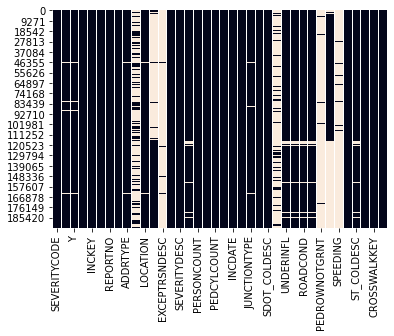

In [7]:
sns.heatmap(df.isnull(), cbar=False)

In [8]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
SEVERITYCODE,1.000000,0.010309,0.017737,0.020131,0.022065,0.022079,0.006553,1.000000,0.130949,0.246338,0.214218,-0.054686,0.188905,0.004226,0.104276,0.175093
X,0.010309,1.000000,-0.160262,0.009956,0.010309,0.010300,0.120754,0.010309,0.012887,0.011304,-0.001752,-0.012168,0.010904,-0.001016,-0.001618,0.013586
Y,0.017737,-0.160262,1.000000,-0.023848,-0.027396,-0.027415,-0.114935,0.017737,-0.013850,0.010178,0.026304,0.017058,-0.019694,-0.006958,0.004618,0.009508
OBJECTID,0.020131,0.009956,-0.023848,1.000000,0.946383,0.945837,0.046929,0.020131,-0.062333,0.024604,0.034432,-0.094280,-0.037094,0.969276,0.028076,0.056046
INCKEY,0.022065,0.010309,-0.027396,0.946383,1.000000,0.999996,0.048524,0.022065,-0.061500,0.024918,0.031342,-0.107528,-0.027617,0.990571,0.019701,0.048179
COLDETKEY,0.022079,0.010300,-0.027415,0.945837,0.999996,1.000000,0.048499,0.022079,-0.061403,0.024914,0.031296,-0.107598,-0.027461,0.990571,0.019586,0.048063
INTKEY,0.006553,0.120754,-0.114935,0.046929,0.048524,0.048499,1.000000,0.006553,0.001886,-0.004784,0.000531,-0.012929,0.007114,0.032604,-0.010510,0.018420
SEVERITYCODE.1,1.000000,0.010309,0.017737,0.020131,0.022065,0.022079,0.006553,1.000000,0.130949,0.246338,0.214218,-0.054686,0.188905,0.004226,0.104276,0.175093
PERSONCOUNT,0.130949,0.012887,-0.013850,-0.062333,-0.061500,-0.061403,0.001886,0.130949,1.000000,-0.023464,-0.038809,0.380523,-0.128960,0.011784,-0.021383,-0.032258
PEDCOUNT,0.246338,0.011304,0.010178,0.024604,0.024918,0.024914,-0.004784,0.246338,-0.023464,1.000000,-0.016920,-0.261285,0.260393,0.021461,0.001810,0.565326


converting categorical variables to Dummy
From the above correlation matrix we find out that datafields "SDOTCOLNUM", "INCKEY", "COLDETKEY" & "OBJECTID" are highly correlated. Hence we can drop 3 columns from them. As "OBJECTID" does not have any NaN values hence we can use that . Also there are two identical columns "SEVERITYCODE.1" and "SEVERITYCODE" hence we can drop 1 of them as well

In [9]:
df["ST_COLCODE"] = df["ST_COLCODE"].fillna(df["ST_COLCODE"].mode()[0])
df["UNDERINFL"] = df["UNDERINFL"].fillna(df["UNDERINFL"].mode()[0])
df["X"] = df["X"].fillna(df["X"].median())
df["Y"] = df["Y"].fillna(df["Y"].median())
df["LIGHTCOND"] = df["LIGHTCOND"].fillna(df["LIGHTCOND"].mode()[0])
df = df.drop(["SDOTCOLNUM","INTKEY","COLDETKEY","SEVERITYCODE.1","SPEEDING" ,"EXCEPTRSNDESC","PEDROWNOTGRNT","INATTENTIONIND","EXCEPTRSNCODE","LOCATION","INCDATE","INCDTTM","OBJECTID","REPORTNO","SDOT_COLDESC","ST_COLDESC","ST_COLCODE","SEVERITYDESC"], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   SEVERITYCODE   194673 non-null  int64  
 1   X              194673 non-null  float64
 2   Y              194673 non-null  float64
 3   INCKEY         194673 non-null  int64  
 4   STATUS         194673 non-null  object 
 5   ADDRTYPE       192747 non-null  object 
 6   COLLISIONTYPE  189769 non-null  object 
 7   PERSONCOUNT    194673 non-null  int64  
 8   PEDCOUNT       194673 non-null  int64  
 9   PEDCYLCOUNT    194673 non-null  int64  
 10  VEHCOUNT       194673 non-null  int64  
 11  JUNCTIONTYPE   188344 non-null  object 
 12  SDOT_COLCODE   194673 non-null  int64  
 13  UNDERINFL      194673 non-null  object 
 14  WEATHER        189592 non-null  object 
 15  ROADCOND       189661 non-null  object 
 16  LIGHTCOND      194673 non-null  object 
 17  SEGLANEKEY     194673 non-nul

In [10]:
df.dtypes

SEVERITYCODE       int64
X                float64
Y                float64
INCKEY             int64
STATUS            object
ADDRTYPE          object
COLLISIONTYPE     object
PERSONCOUNT        int64
PEDCOUNT           int64
PEDCYLCOUNT        int64
VEHCOUNT           int64
JUNCTIONTYPE      object
SDOT_COLCODE       int64
UNDERINFL         object
WEATHER           object
ROADCOND          object
LIGHTCOND         object
SEGLANEKEY         int64
CROSSWALKKEY       int64
HITPARKEDCAR      object
dtype: object

In [11]:
clmn = {"STATUS","ADDRTYPE","COLLISIONTYPE","JUNCTIONTYPE","UNDERINFL","WEATHER","ROADCOND","LIGHTCOND","HITPARKEDCAR"}
df = pd.get_dummies(data=df,columns=clmn,prefix=clmn)
df.dtypes

SEVERITYCODE               int64
X                        float64
Y                        float64
INCKEY                     int64
PERSONCOUNT                int64
                          ...   
UNDERINFL_N                uint8
UNDERINFL_Y                uint8
ADDRTYPE_Alley             uint8
ADDRTYPE_Block             uint8
ADDRTYPE_Intersection      uint8
Length: 68, dtype: object

In [12]:
X = df.drop(["SEVERITYCODE"],axis=1)
y = df["SEVERITYCODE"]

**LOGISTIC REGRESSION MODEL**

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

0.7230255554128676
              precision    recall  f1-score   support

           1       0.72      0.99      0.83     27135
           2       0.86      0.10      0.18     11800

    accuracy                           0.72     38935
   macro avg       0.79      0.55      0.51     38935
weighted avg       0.76      0.72      0.64     38935



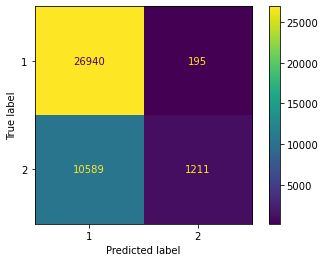

In [15]:
LR = LogisticRegression(max_iter=100000)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)

LR.fit(X_train,y_train)
score = LR.score(X_test, y_test)
print(score)

#y_pred = LR.predict(X_test)


plot_confusion_matrix(LR,X_test,y_test)

y_pred = LR.predict(X_test) 
print(classification_report(y_test, y_pred))

**DECISION TREE CLASSIFIER**

0.6857326313085912
              precision    recall  f1-score   support

           1       0.77      0.77      0.77     27135
           2       0.48      0.48      0.48     11800

    accuracy                           0.69     38935
   macro avg       0.63      0.63      0.63     38935
weighted avg       0.69      0.69      0.69     38935



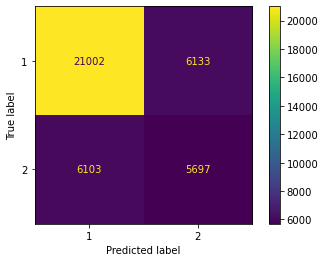

In [16]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import  cross_val_score

DT = DecisionTreeClassifier()

DT.fit(X_train,y_train)
score_1 = DT.score(X_test, y_test)
print(score_1)
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(DT,X_test,y_test)

y_pred_1 = DT.predict(X_test) 

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_1))

**RANDOM FOREST CLASSIFIER**

0.7375626043405676
              precision    recall  f1-score   support

           1       0.73      0.99      0.84     27135
           2       0.90      0.15      0.26     11800

    accuracy                           0.74     38935
   macro avg       0.81      0.57      0.55     38935
weighted avg       0.78      0.74      0.66     38935



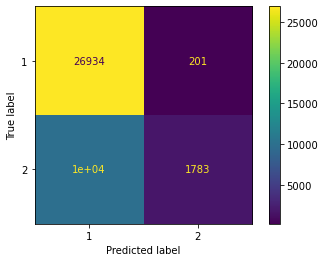

In [17]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)

random_forest.fit(X_train,y_train)
score_2 = random_forest.score(X_test, y_test)
print(score_2)

plot_confusion_matrix(random_forest,X_test,y_test)


y_pred_2 = random_forest.predict(X_test) 

print(classification_report(y_test, y_pred_2))

**CONCLUSION**

Based on the dataset provided for this capstone from weather, road, and light conditions pointing to certain classes, we can conclude that particular conditions have a somewhat impact on whether or not travel could result in property damage (class 1) or injury (class 2).